In [2]:
import db_utils
import df_info
import pandas as pd
import df_transform
import df_visualisation
import df_data_transform

pd.set_option('display.max_columns', 500)

In [5]:
credentials=db_utils.load_yaml_file()
session=db_utils.RDSDatabaseConnector()
engine=session.initialise_db_engine()
df=session.read_rds_table(engine, 'loan_payments')
df.head(5)
session.dataframe_to_csv(df,'test1.csv')

In [6]:
df_loan=db_utils.load_data_from_csv('test1.csv')

In [ ]:
df_loan.columns

In [ ]:
df_loan.info()

In [ ]:
df_loan.head()

In [ ]:
# By eyeballing data 
cat_columns=['id','member_id','term','grade','sub_grade','employment_length','home_ownership','verification_status','loan_status','payment_plan','purpose','application_type','policy_code']
date_columns=['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']

In [ ]:
tidying_up_in_progress=df_transform.DataTransform(df_loan)

In [ ]:
for col in date_columns:
    tidying_up_in_progress.datetime_conversion(col)

for col in cat_columns:
    tidying_up_in_progress.category_conversion(col)

In [ ]:
df_loan.info()

In [ ]:
df_session=df_info.DataFrameInfo(df_loan)

In [ ]:
# df_session.df_info('int_rate'), df_session.df_info('loan_amount')

In [ ]:
df_session.df_shape_check()

In [ ]:
df_session.null_value_check()

* firstly,  Dropping columns that null value check has over 50%. Columns are  mths_since_last_delinq, mths_since_last_record, mths_since_last_major_derog, next_payment_date


In [ ]:
columns=['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog','next_payment_date']

In [ ]:
tidying_up_in_progress.drop_cols(columns)


In [ ]:
df_session.df_shape_check()

In [ ]:
df_session.null_value_check()

secondly, dropping rows null value in the cell in last_payment_date, last_credit_pull_date, collections_12_mths_ex_med columns (i.e. null value checks that have returned less than 1%)

In [ ]:
tidying_up_in_progress.drop_rows('collections_12_mths_ex_med')
tidying_up_in_progress.drop_rows('last_payment_date')
tidying_up_in_progress.drop_rows('last_credit_pull_date')

In [ ]:
df_session.null_value_check()

In [ ]:
df_loan.term.value_counts(),df_loan.employment_length.value_counts()

In [ ]:
# df_loan[df_loan.employment_length.isnull()]
# df_loan.employment_length.astype('category').value_counts()

In [ ]:
tidying_up_in_progress.remove_strings('term')

In [ ]:
df_loan.term.value_counts()

In [ ]:
df_loan.employment_length=df_loan.employment_length.str.replace('< 1 year', '0')
tidying_up_in_progress.remove_strings('employment_length')

In [ ]:
df_loan.employment_length.value_counts()

* dropping null rows in term and empoyement_length 

* median value will be used to populate null values for funded_amount and int_rate

In [ ]:
tidying_up_in_progress.drop_rows('term')
tidying_up_in_progress.drop_rows('employment_length')

In [ ]:
tidying_up_in_progress.impute_median('funded_amount')
tidying_up_in_progress.impute_median('int_rate')

In [ ]:
df_session.null_value_check()

In [ ]:
vis=df_visualisation.Plotter(df_loan)

In [ ]:
# vis.K2test('funded_amount'),vis.K2test('int_rate'),vis.K2test('employment_length'),vis.K2test('term')

In [ ]:
# vis.plt_boxplot('funded_amount'),vis.plt_boxplot('int_rate')

In [ ]:
# vis.qq_plt('funded_amount'), vis.qq_plt('int_rate')

In [ ]:
# vis.plt_hist('funded_amount')

In [ ]:
# vis.plt_hist('int_rate')

In [ ]:
# vis.qq_plt('funded_amount'), vis.qq_plt('int_rate'), vis.plt_boxplot('funded_amount'),vis.plt_boxplot('int_rate')

In [ ]:
# for col in df_loan.columns:

#     if df_loan[col].dtype=='float64' or df_loan[col].dtype=='int64':
#         # print(df_loan[col].mean(), df_loan[col].median())
#         print(col, "skewness: %.3f "%df_loan[col].skew())

df_loan.skew(numeric_only=True)



In [3]:
selected_columns=['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'out_prncp','out_prncp_inv',
                  'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
                  'collection_recovery_fee', 'last_payment_amount']

In [ ]:
# plt_corr=df_loan[selected_columns].corr()

In [ ]:
# plt_corr=df_loan.select_dtypes(include="number").corr()
# plt_corr=df_loan.select_dtypes(include="number").corr()

In [4]:
df_selected=df_loan[selected_columns]

In [ ]:
# saving df_loan_to file

df_loan.to_csv('df_loan_backup.csv')
df_loan_backup=df_loan.copy()

In [2]:
df_loan=db_utils.load_data_from_csv('df_loan_backup.csv')

In [ ]:
df_loan.shape, df_loan_backup.shape

In [ ]:
df_selected=df_loan[selected_columns]

In [5]:
import numpy as np
from scipy.stats import normaltest, boxcox, yeojohnson

In [6]:
# Skewness post log_transform
for col in selected_columns:
    log_pop=df_loan[col].map(lambda i: np.log(i) if i>0 else 0)

    print(col, "log trans:", log_pop.skew())



loan_amount log trans: -0.6852322678264856
funded_amount log trans: -0.7228327360182454
funded_amount_inv log trans: -4.523186412398262
int_rate log trans: -0.3787782260648894
instalment log trans: -0.6736939692323577
annual_inc log trans: 0.20021480894403273
out_prncp log trans: 0.59220424307201
out_prncp_inv log trans: 0.5922858498410565
total_payment log trans: -0.7513753590196507
total_payment_inv log trans: -2.8814615405072916
total_rec_prncp log trans: -0.9181079707767223
total_rec_int log trans: -0.5572989373943639
total_rec_late_fee log trans: 5.485499820889978
recoveries log trans: 3.824825965214093
collection_recovery_fee log trans: 5.425398645602331
last_payment_amount log trans: 0.1241754174225669


In [7]:
for col in selected_columns:
    if np.any(df_loan[col]<=0):
        pass
    else:    
        bc_pop=boxcox(df_loan[col])
        bc_pop=pd.Series(bc_pop[0]) 
        print(col, "boxcox trans:", bc_pop.skew())
        

loan_amount boxcox trans: -0.043411063602275875
funded_amount boxcox trans: -0.029923847465065923
int_rate boxcox trans: -0.013326047925606026
instalment boxcox trans: -0.02063834802985608
annual_inc boxcox trans: -0.016454945302586548
total_payment boxcox trans: -0.013700479471384688
total_rec_int boxcox trans: 0.0011765625924683824


In [8]:
for col in selected_columns:

        yj_pop=yeojohnson(df_loan[col])
        yj_pop = pd.Series(yj_pop) 
        yj_pop=pd.Series(yj_pop[0])
        print(col, "yeojohnson trans:", yj_pop.skew())
        

loan_amount yeojohnson trans: -0.0434019108947703
funded_amount yeojohnson trans: -0.029919141914106974
funded_amount_inv yeojohnson trans: -0.036526785967750115
int_rate yeojohnson trans: -0.011022207977682054
instalment yeojohnson trans: -0.020587230351742026
annual_inc yeojohnson trans: -0.01645745011413307
out_prncp yeojohnson trans: 0.5478820656372799
out_prncp_inv yeojohnson trans: 0.5479007788558953
total_payment yeojohnson trans: -0.013720325948957413
total_payment_inv yeojohnson trans: 0.006565584929199939
total_rec_prncp yeojohnson trans: -0.01820667578681969
total_rec_int yeojohnson trans: 0.0007848761483274787
total_rec_late_fee yeojohnson trans: 5.25940034715612
recoveries yeojohnson trans: 3.486211634728462
collection_recovery_fee yeojohnson trans: 3.627053212755875
last_payment_amount yeojohnson trans: 0.0023587252677930676


In [9]:
# go for yeojohnson transform

In [10]:
from df_visualisation import Plotter

In [11]:
# fig=plt.figure(figsize=(20,20))
# ax=fig.gca()
# df_selected.hist(ax=ax)

In [12]:
to_plot=Plotter(df_selected)

/Users/kyungmioh/AICore/Exploratory-Data-Analysis---Customer-Loans-in-Finance/df_visualisation.py:17: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  return self.df.hist(ax=ax)


array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'funded_amount'}>,
        <Axes: title={'center': 'funded_amount_inv'}>,
        <Axes: title={'center': 'int_rate'}>],
       [<Axes: title={'center': 'instalment'}>,
        <Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'out_prncp'}>,
        <Axes: title={'center': 'out_prncp_inv'}>],
       [<Axes: title={'center': 'total_payment'}>,
        <Axes: title={'center': 'total_payment_inv'}>,
        <Axes: title={'center': 'total_rec_prncp'}>,
        <Axes: title={'center': 'total_rec_int'}>],
       [<Axes: title={'center': 'total_rec_late_fee'}>,
        <Axes: title={'center': 'recoveries'}>,
        <Axes: title={'center': 'collection_recovery_fee'}>,
        <Axes: title={'center': 'last_payment_amount'}>]], dtype=object)

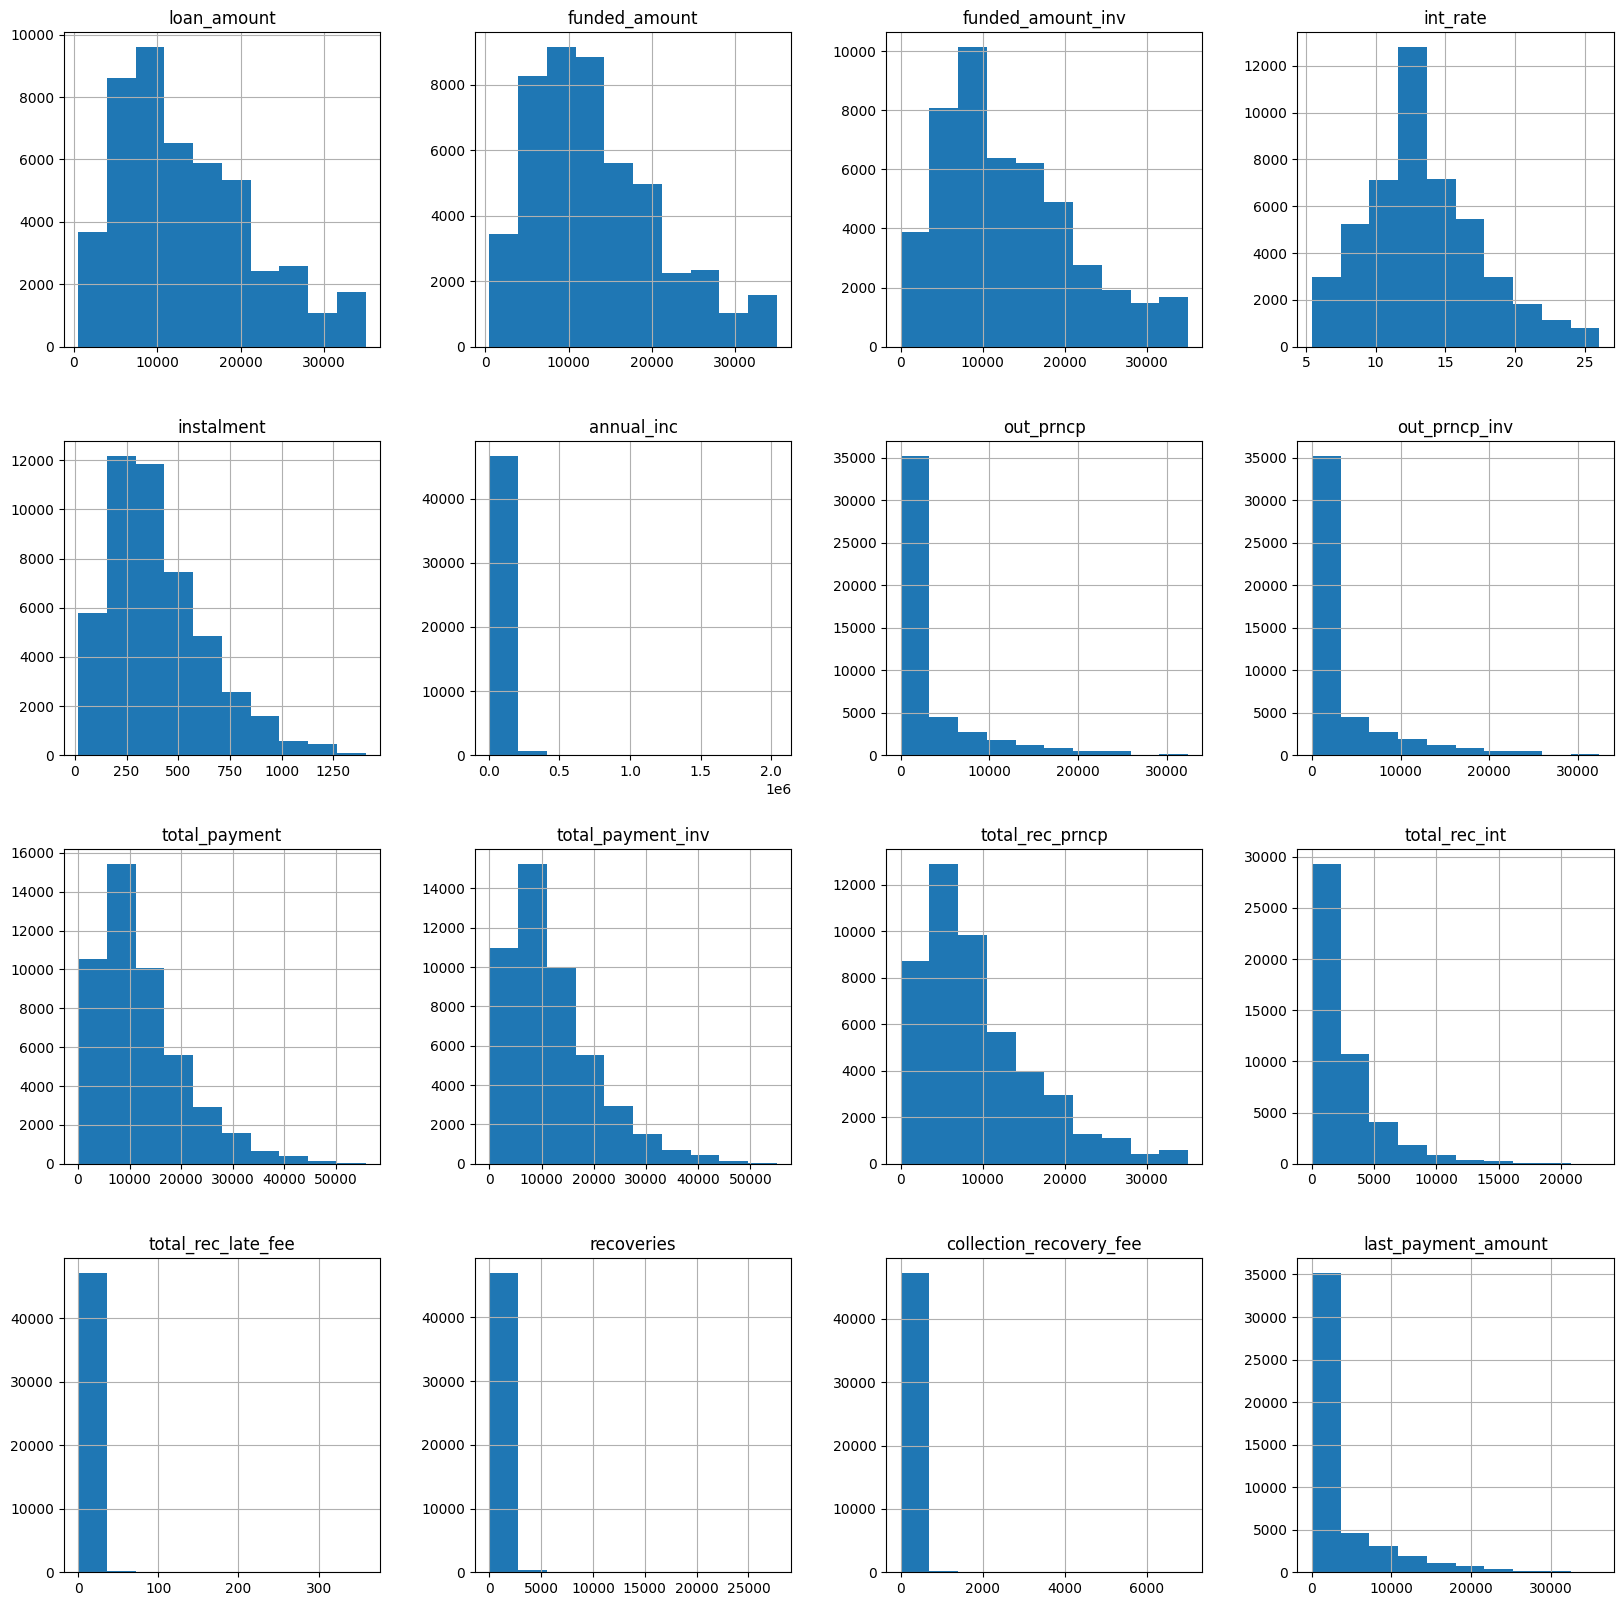

In [13]:
to_plot.df_hist()

<Axes: >

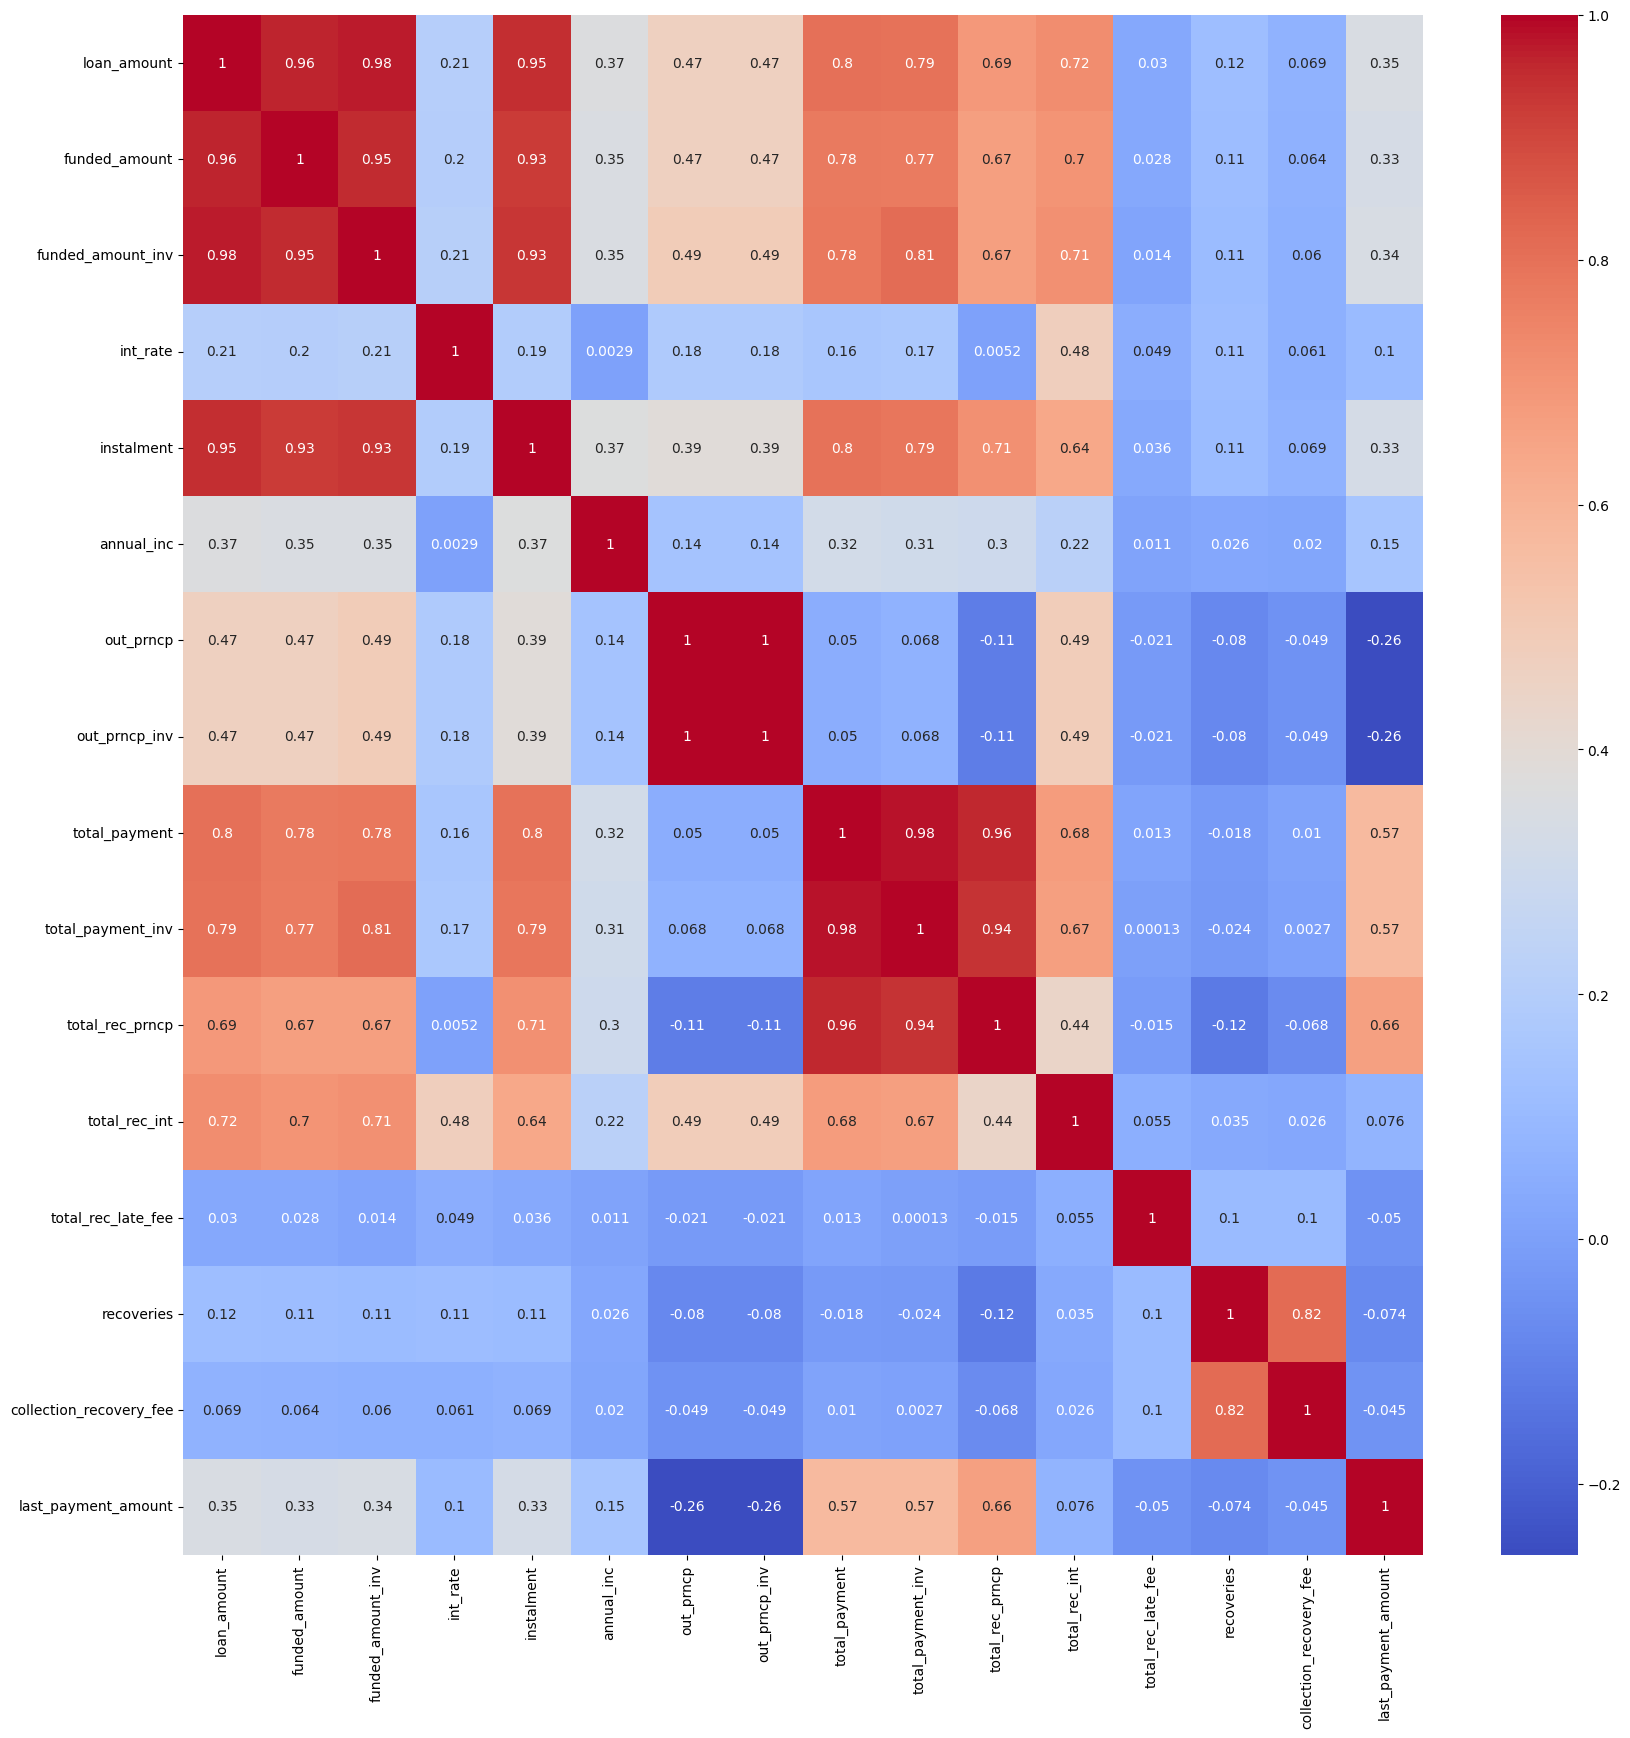

In [14]:
to_plot.plot_heatmap()

In [15]:
to_transform=df_data_transform.DataFrameTransform(df_selected)

In [16]:
for col in selected_columns:
    print(col)
    to_transform.yj_transform(col)

loan_amount
funded_amount
funded_amount_inv
int_rate


/Users/kyungmioh/AICore/Exploratory-Data-Analysis---Customer-Loans-in-Finance/df_data_transform.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column]=yj_pop[0]


instalment
annual_inc
out_prncp
out_prncp_inv
total_payment
total_payment_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_payment_amount


In [17]:
df_selected

,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount
0,69.831654,72.628968,122.496368,3.368816,16.284057,6.910281,4.197504,4.197158,33.246738,51.772911,33.182653,10.776851,0.000000,0.0,0.0,4.937219
1,84.360281,87.978201,153.827275,3.228661,19.784292,6.942183,4.287440,4.287073,39.063039,62.925073,39.370351,11.997706,0.000000,0.0,0.0,5.324908
2,90.685402,94.674094,167.857520,3.368816,21.378289,7.088611,0.000000,0.000000,58.036232,101.983359,61.779926,12.131470,0.000000,0.0,0.0,7.833362
3,88.513779,92.374313,163.015265,4.921304,21.662034,6.875203,0.000000,0.000000,57.061386,99.887812,60.490969,12.547079,0.000000,0.0,0.0,7.886412
4,88.513779,92.374313,163.015265,2.943931,20.677270,7.329377,4.308386,4.308014,40.529710,65.803910,41.231051,11.933760,0.000000,0.0,0.0,5.413133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54199,31.282845,32.184156,0.000000,5.251497,7.025737,6.742963,0.000000,0.000000,24.583272,0.000000,24.278621,8.481716,0.000000,0.0,0.0,5.541354
54203,62.609205,65.016668,33.947324,3.920698,14.687312,6.534466,0.000000,0.000000,43.742928,25.990928,44.722320,12.500783,0.000000,0.0,0.0,4.737064
54204,53.633811,55.576123,57.618950,3.439734,12.286932,7.022192,0.000000,0.000000,38.023005,41.770747,39.054326,10.687933,0.000000,0.0,0.0,4.392737
54221,60.569778,62.869579,102.812528,4.694246,14.472337,6.598386,0.000000,0.000000,41.305156,67.095266,43.445167,9.406609,0.000000,0.0,0.0,4.075422


/Users/kyungmioh/AICore/Exploratory-Data-Analysis---Customer-Loans-in-Finance/df_visualisation.py:17: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  return self.df.hist(ax=ax)


array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'funded_amount'}>,
        <Axes: title={'center': 'funded_amount_inv'}>,
        <Axes: title={'center': 'int_rate'}>],
       [<Axes: title={'center': 'instalment'}>,
        <Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'out_prncp'}>,
        <Axes: title={'center': 'out_prncp_inv'}>],
       [<Axes: title={'center': 'total_payment'}>,
        <Axes: title={'center': 'total_payment_inv'}>,
        <Axes: title={'center': 'total_rec_prncp'}>,
        <Axes: title={'center': 'total_rec_int'}>],
       [<Axes: title={'center': 'total_rec_late_fee'}>,
        <Axes: title={'center': 'recoveries'}>,
        <Axes: title={'center': 'collection_recovery_fee'}>,
        <Axes: title={'center': 'last_payment_amount'}>]], dtype=object)

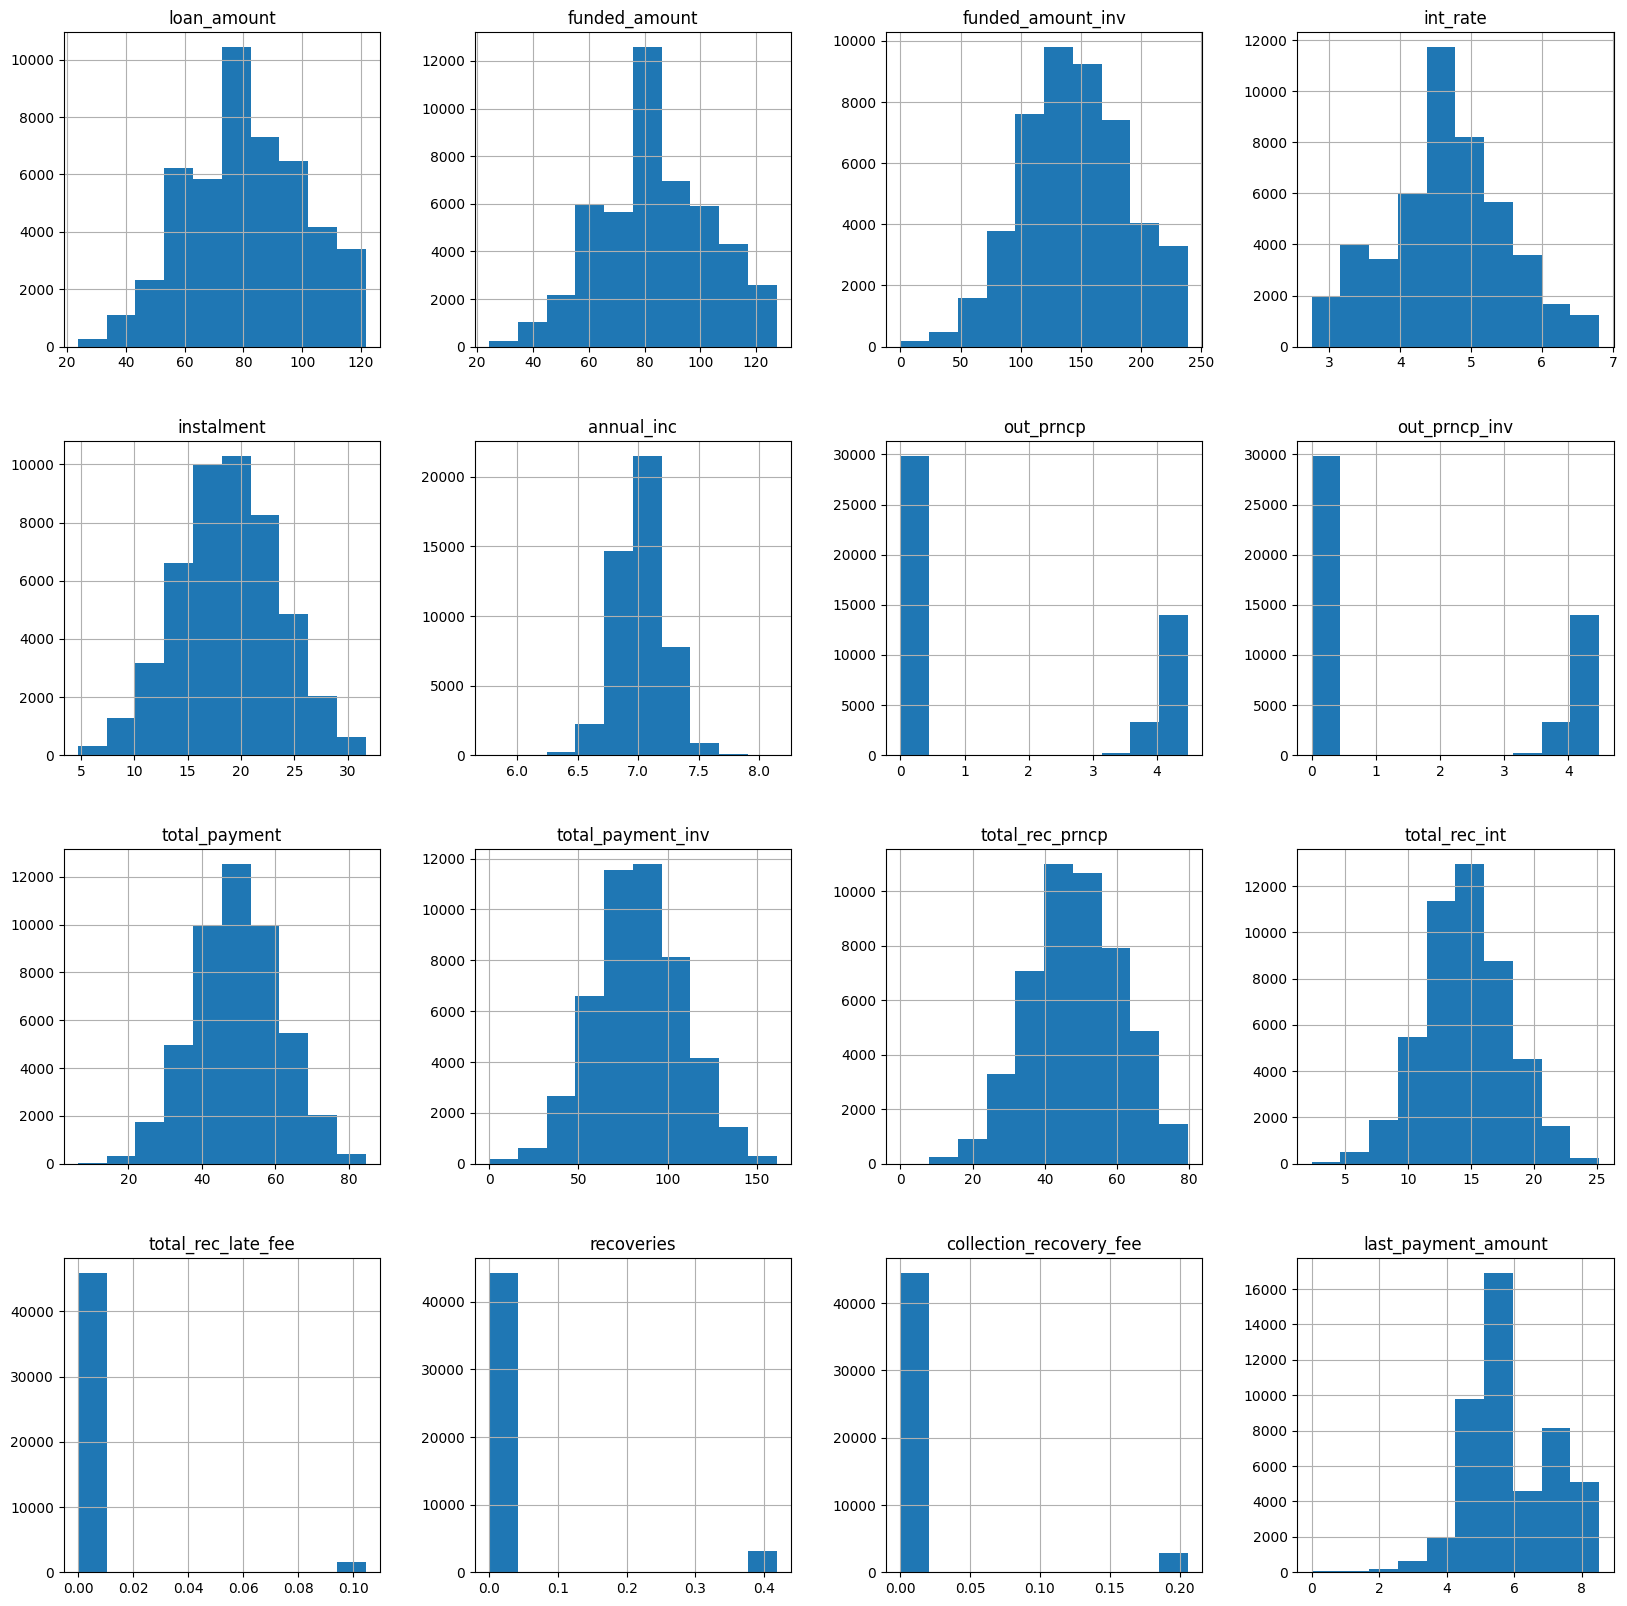

In [18]:
to_plot.df_hist()

<Axes: >

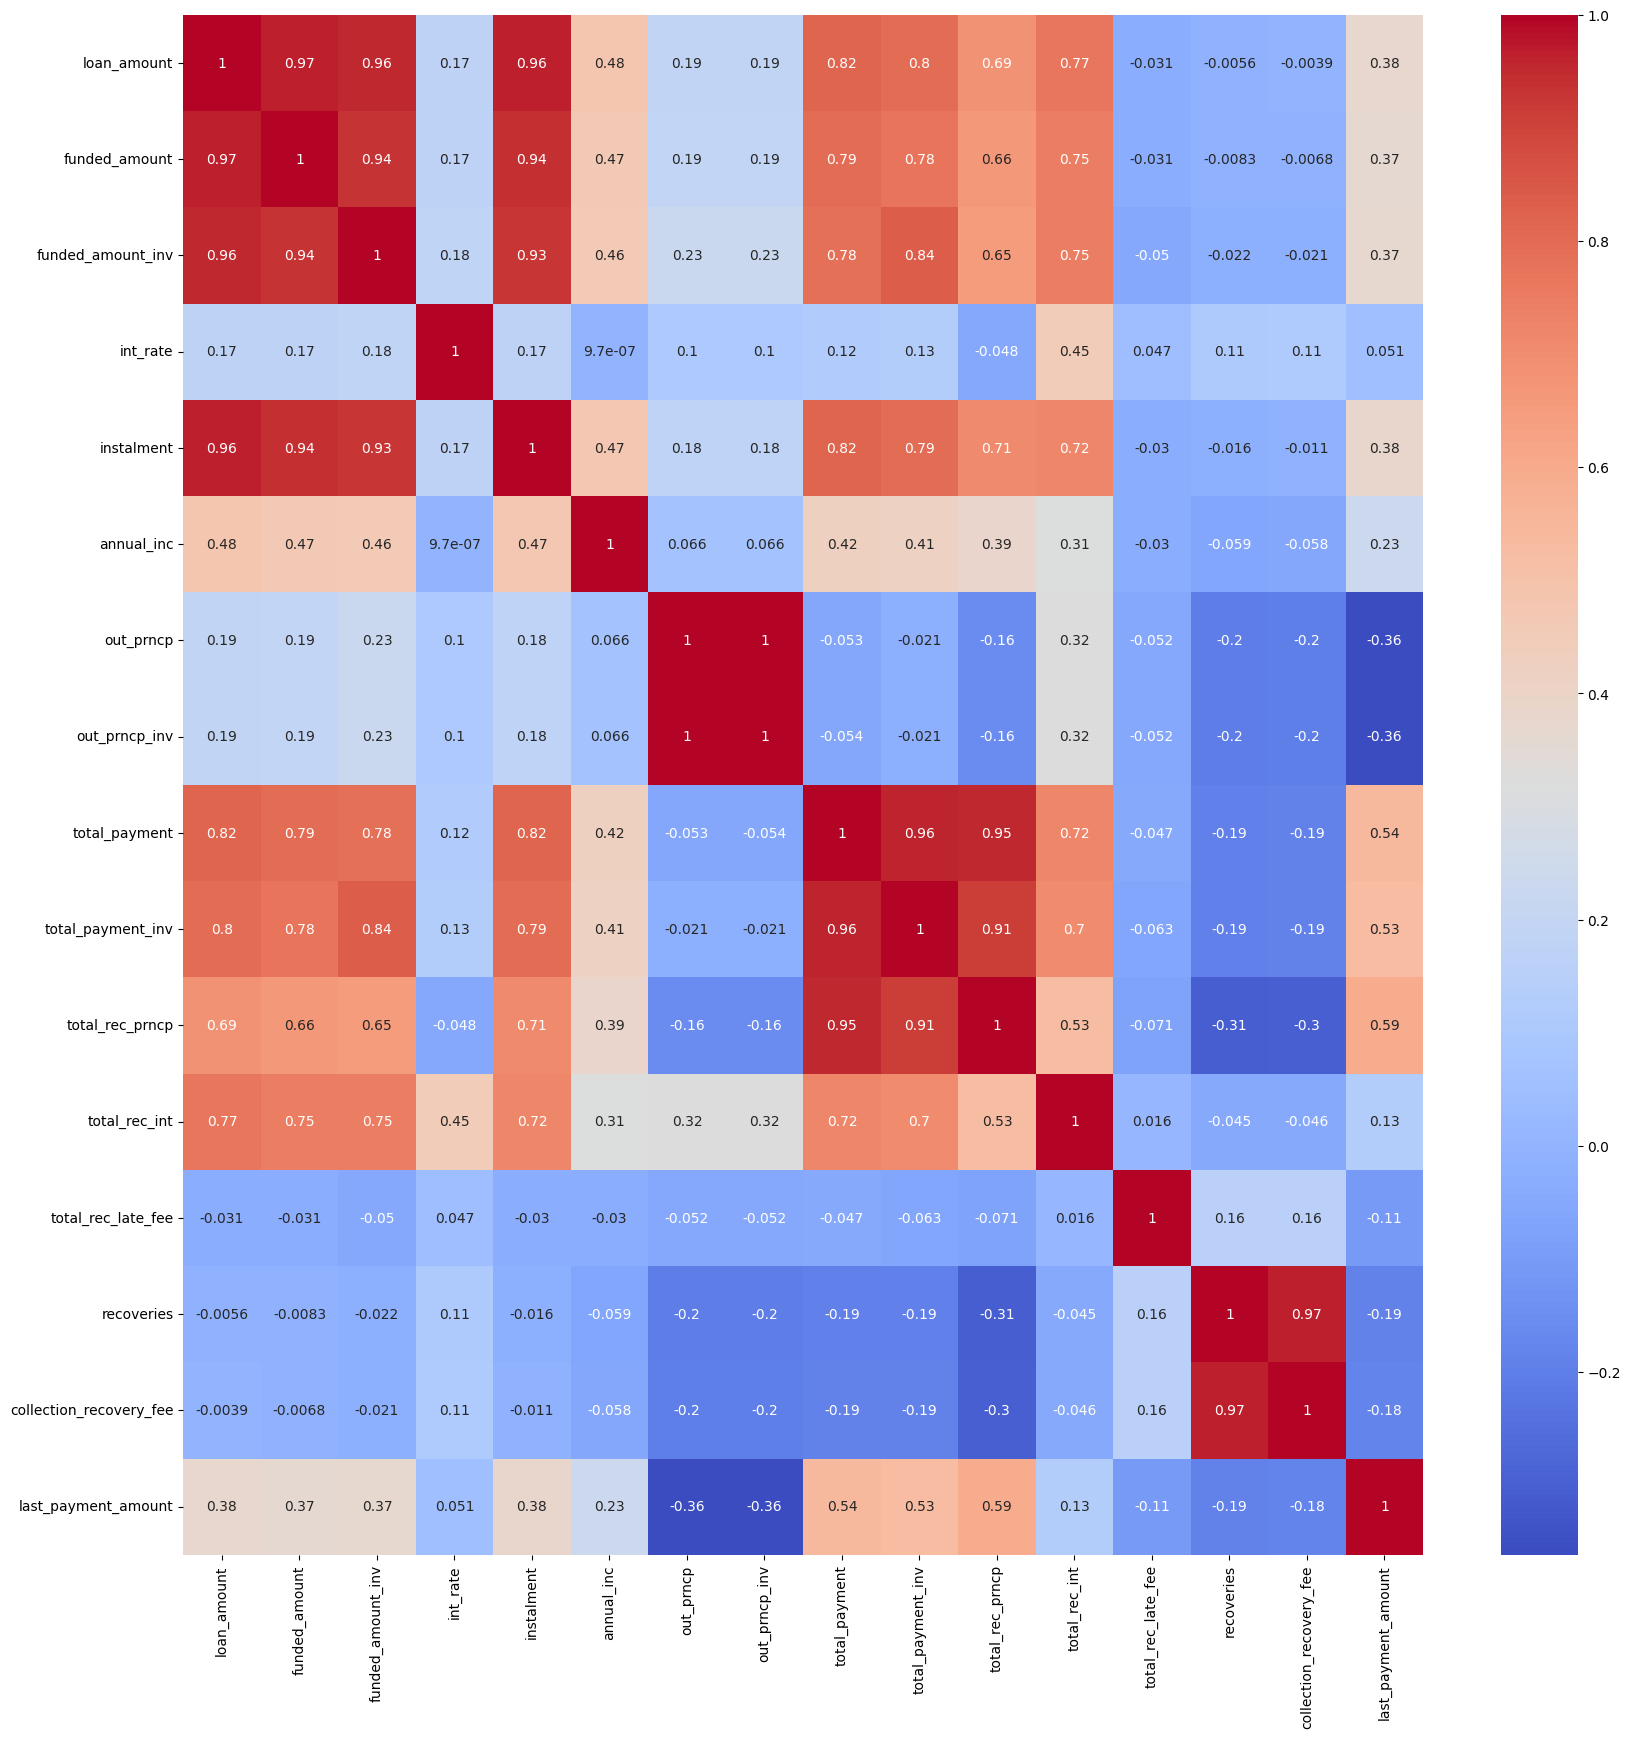

In [19]:
to_plot.plot_heatmap()

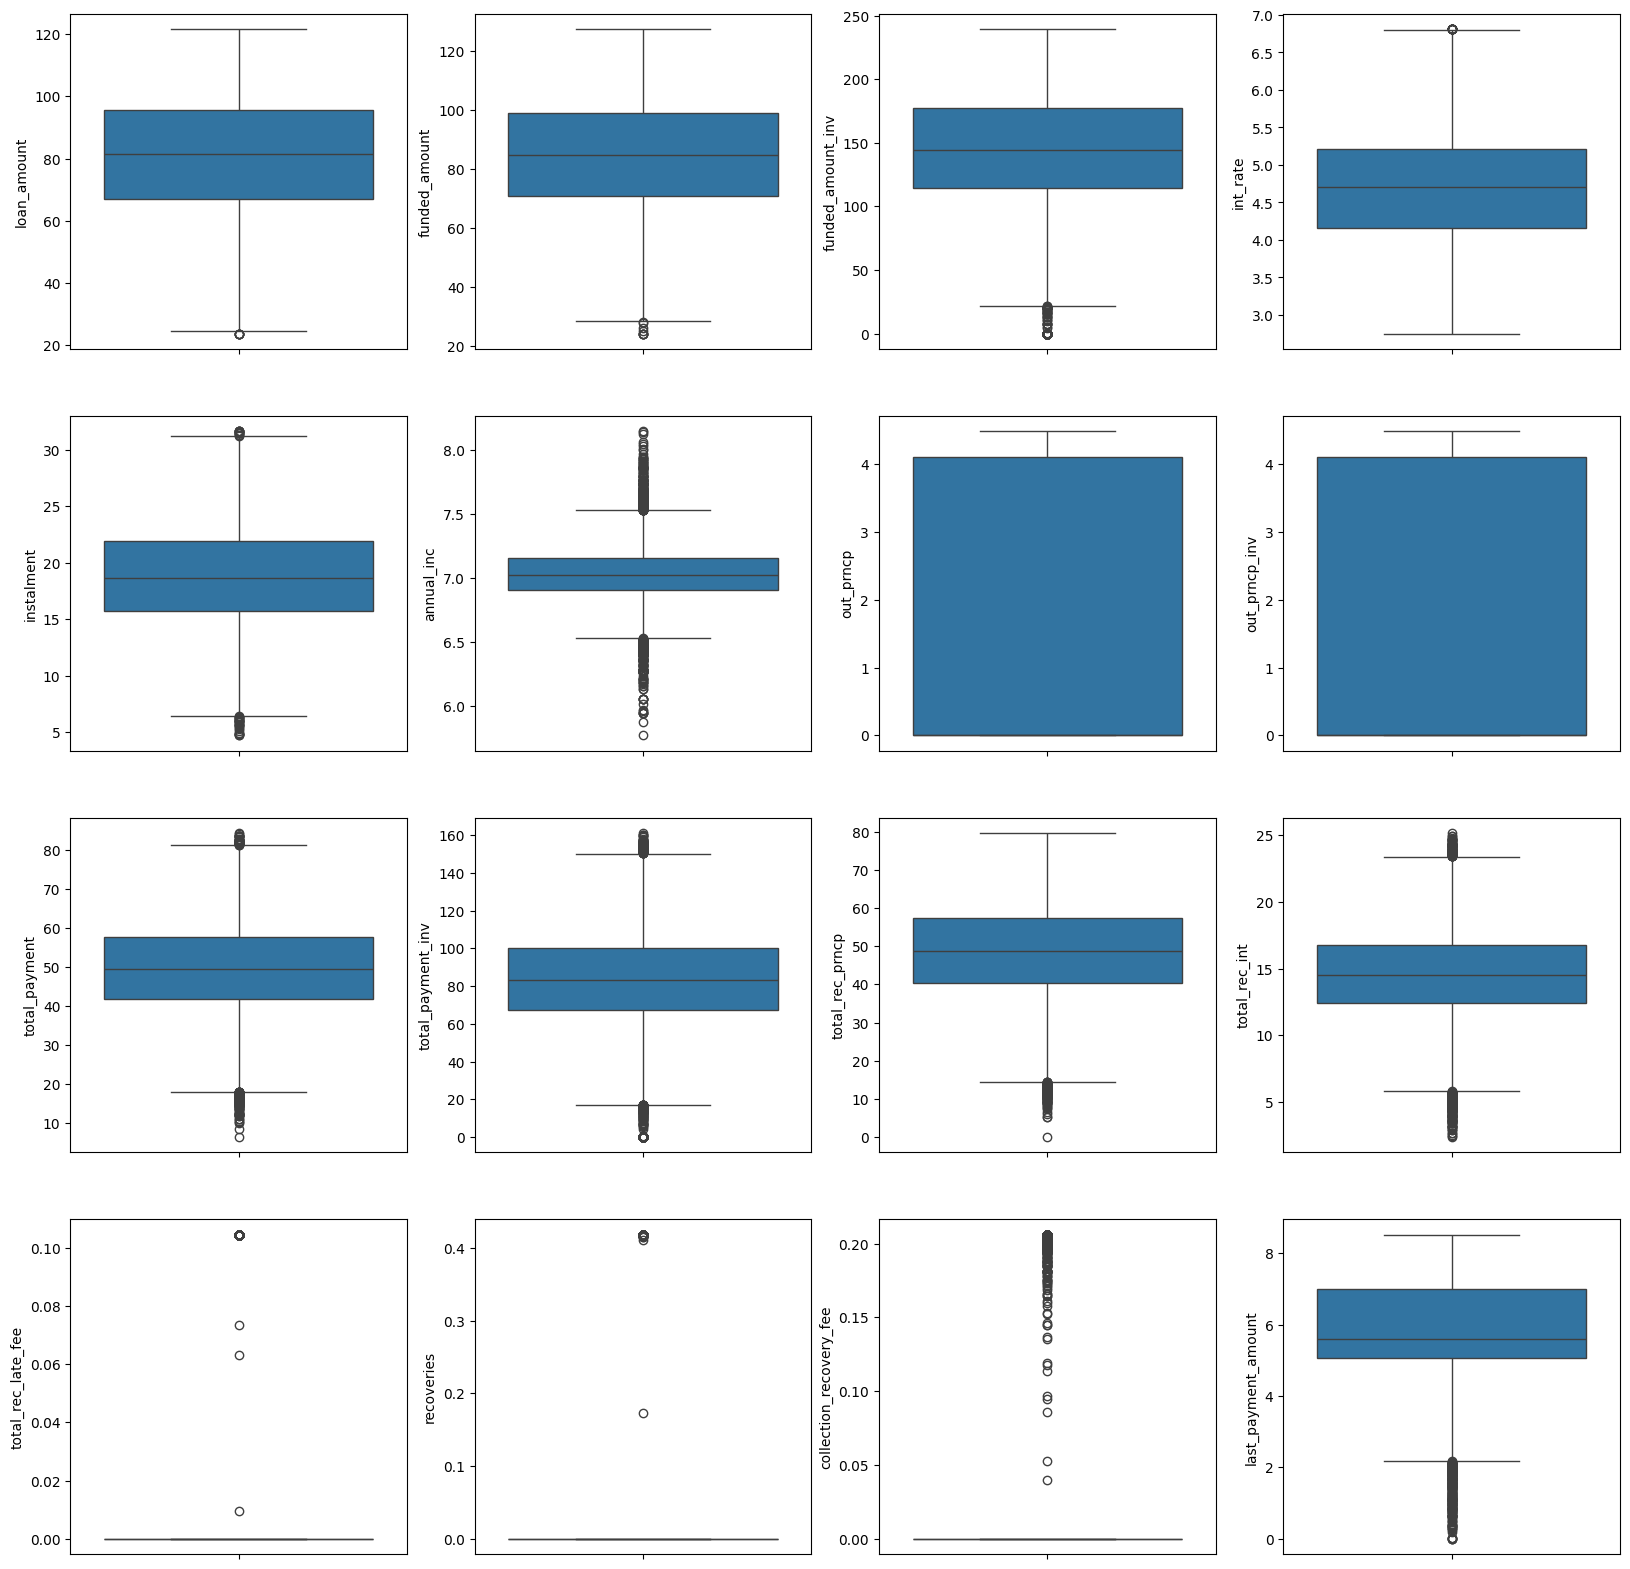

In [20]:
to_plot.plt_boxplot()


instead of dropping outliers, capping and flooring will be used. 



In [21]:
to_transform.handle_outliers('loan_amount')

,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount
0,69.831654,72.628968,122.496368,3.368816,16.284057,6.910281,4.197504,4.197158,33.246738,51.772911,33.182653,10.776851,0.000000,0.0,0.0,4.937219
1,84.360281,87.978201,153.827275,3.228661,19.784292,6.942183,4.287440,4.287073,39.063039,62.925073,39.370351,11.997706,0.000000,0.0,0.0,5.324908
2,90.685402,94.674094,167.857520,3.368816,21.378289,7.088611,0.000000,0.000000,58.036232,101.983359,61.779926,12.131470,0.000000,0.0,0.0,7.833362
3,88.513779,92.374313,163.015265,4.921304,21.662034,6.875203,0.000000,0.000000,57.061386,99.887812,60.490969,12.547079,0.000000,0.0,0.0,7.886412
4,88.513779,92.374313,163.015265,2.943931,20.677270,7.329377,4.308386,4.308014,40.529710,65.803910,41.231051,11.933760,0.000000,0.0,0.0,5.413133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54199,31.282845,32.184156,0.000000,5.251497,7.025737,6.742963,0.000000,0.000000,24.583272,0.000000,24.278621,8.481716,0.000000,0.0,0.0,5.541354
54203,62.609205,65.016668,33.947324,3.920698,14.687312,6.534466,0.000000,0.000000,43.742928,25.990928,44.722320,12.500783,0.000000,0.0,0.0,4.737064
54204,53.633811,55.576123,57.618950,3.439734,12.286932,7.022192,0.000000,0.000000,38.023005,41.770747,39.054326,10.687933,0.000000,0.0,0.0,4.392737
54221,60.569778,62.869579,102.812528,4.694246,14.472337,6.598386,0.000000,0.000000,41.305156,67.095266,43.445167,9.406609,0.000000,0.0,0.0,4.075422


In [22]:
outlier_check_columns=['loan_amount','funded_amount','funded_amount_inv','int_rate','instalment','annual_inc','total_payment','total_payment_inv','total_rec_prncp','total_rec_int','last_payment_amount']

In [23]:
for col in outlier_check_columns:

    to_transform.handle_outliers(col)

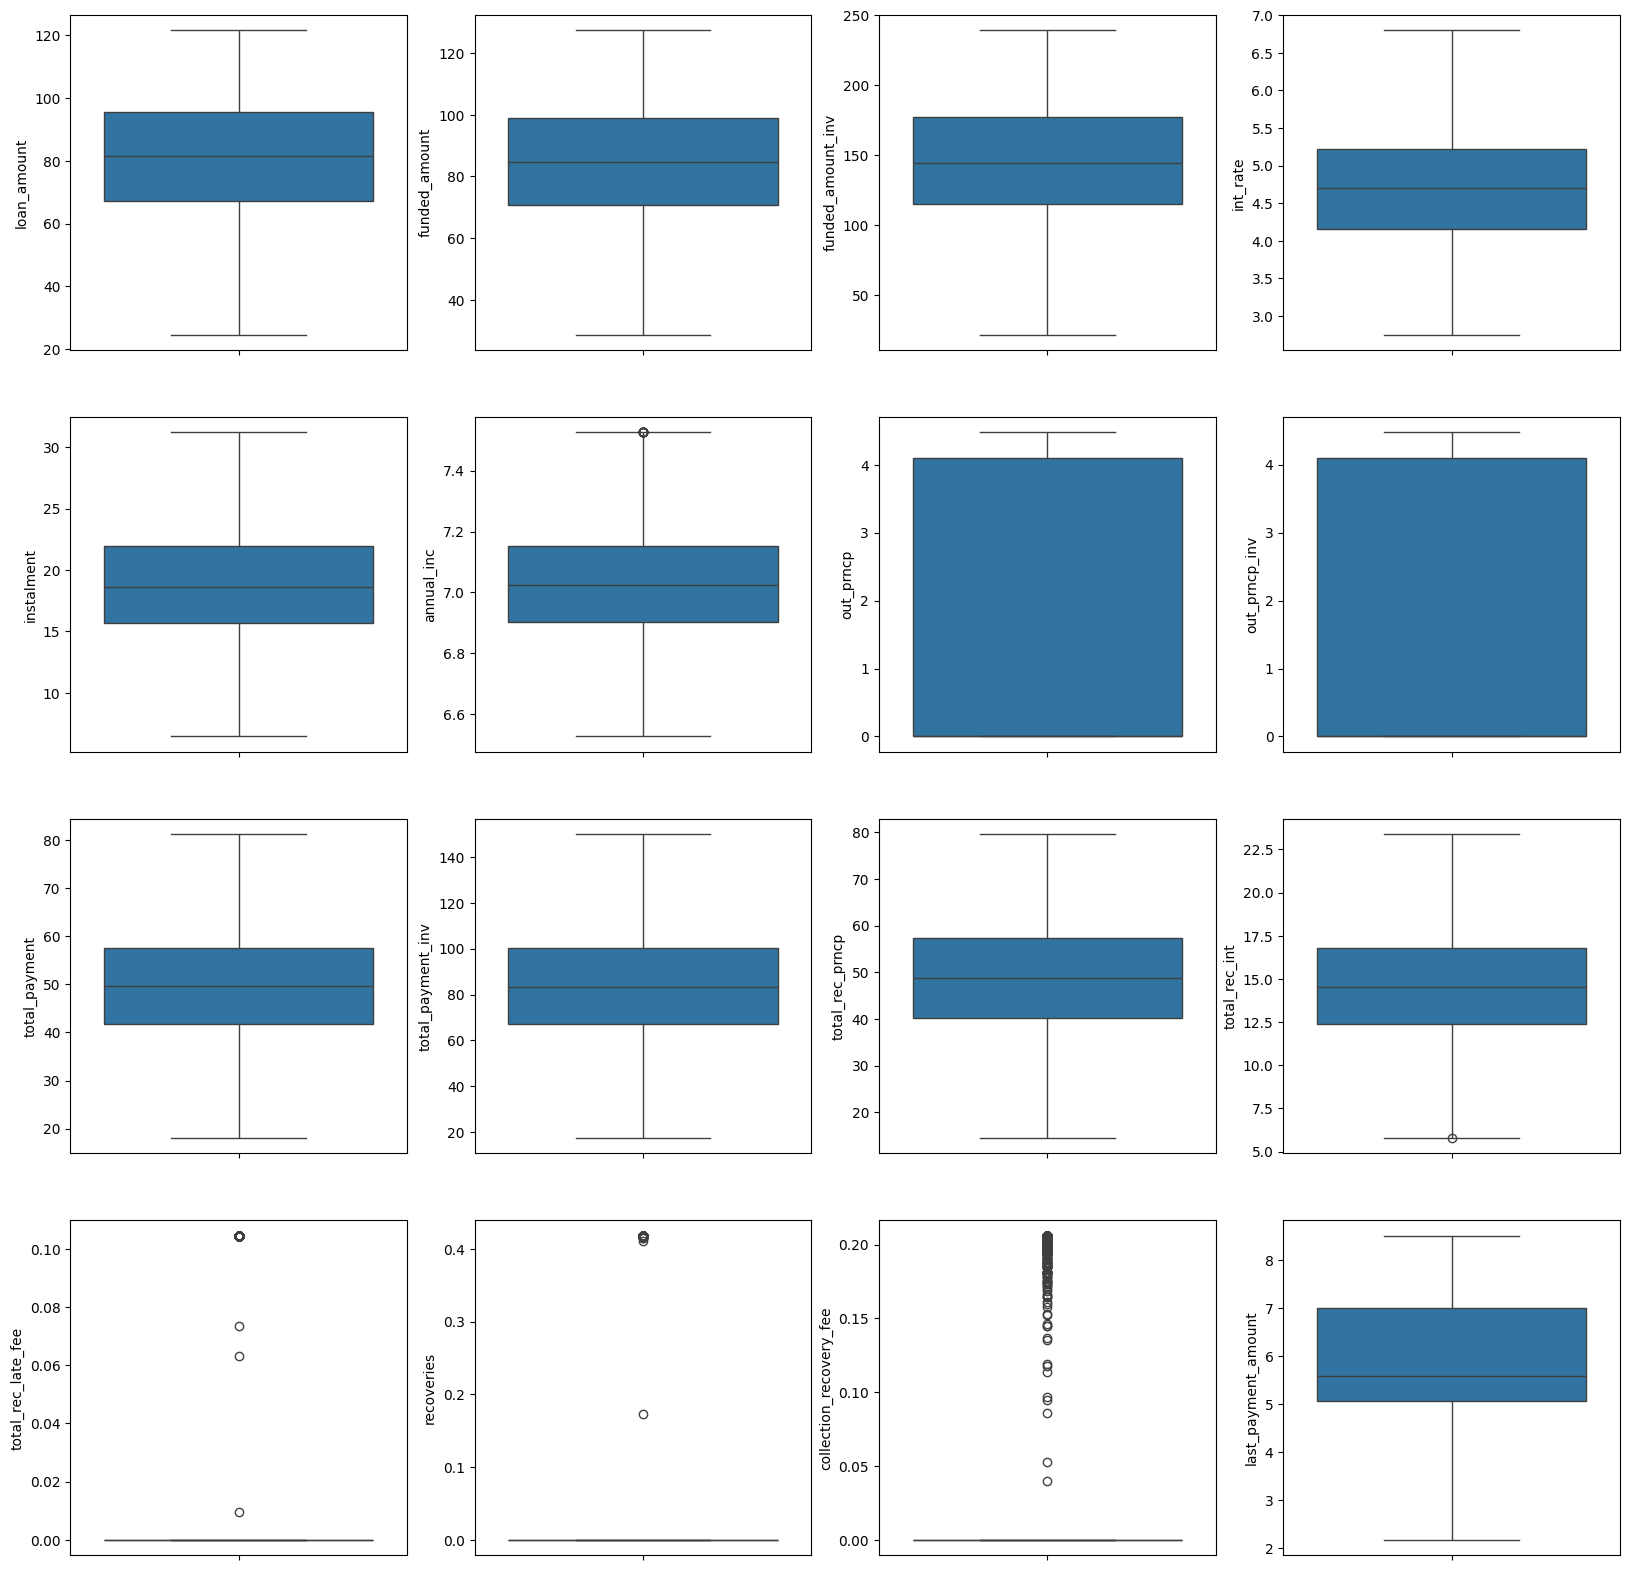

In [24]:
to_plot.plt_boxplot()

<Axes: >

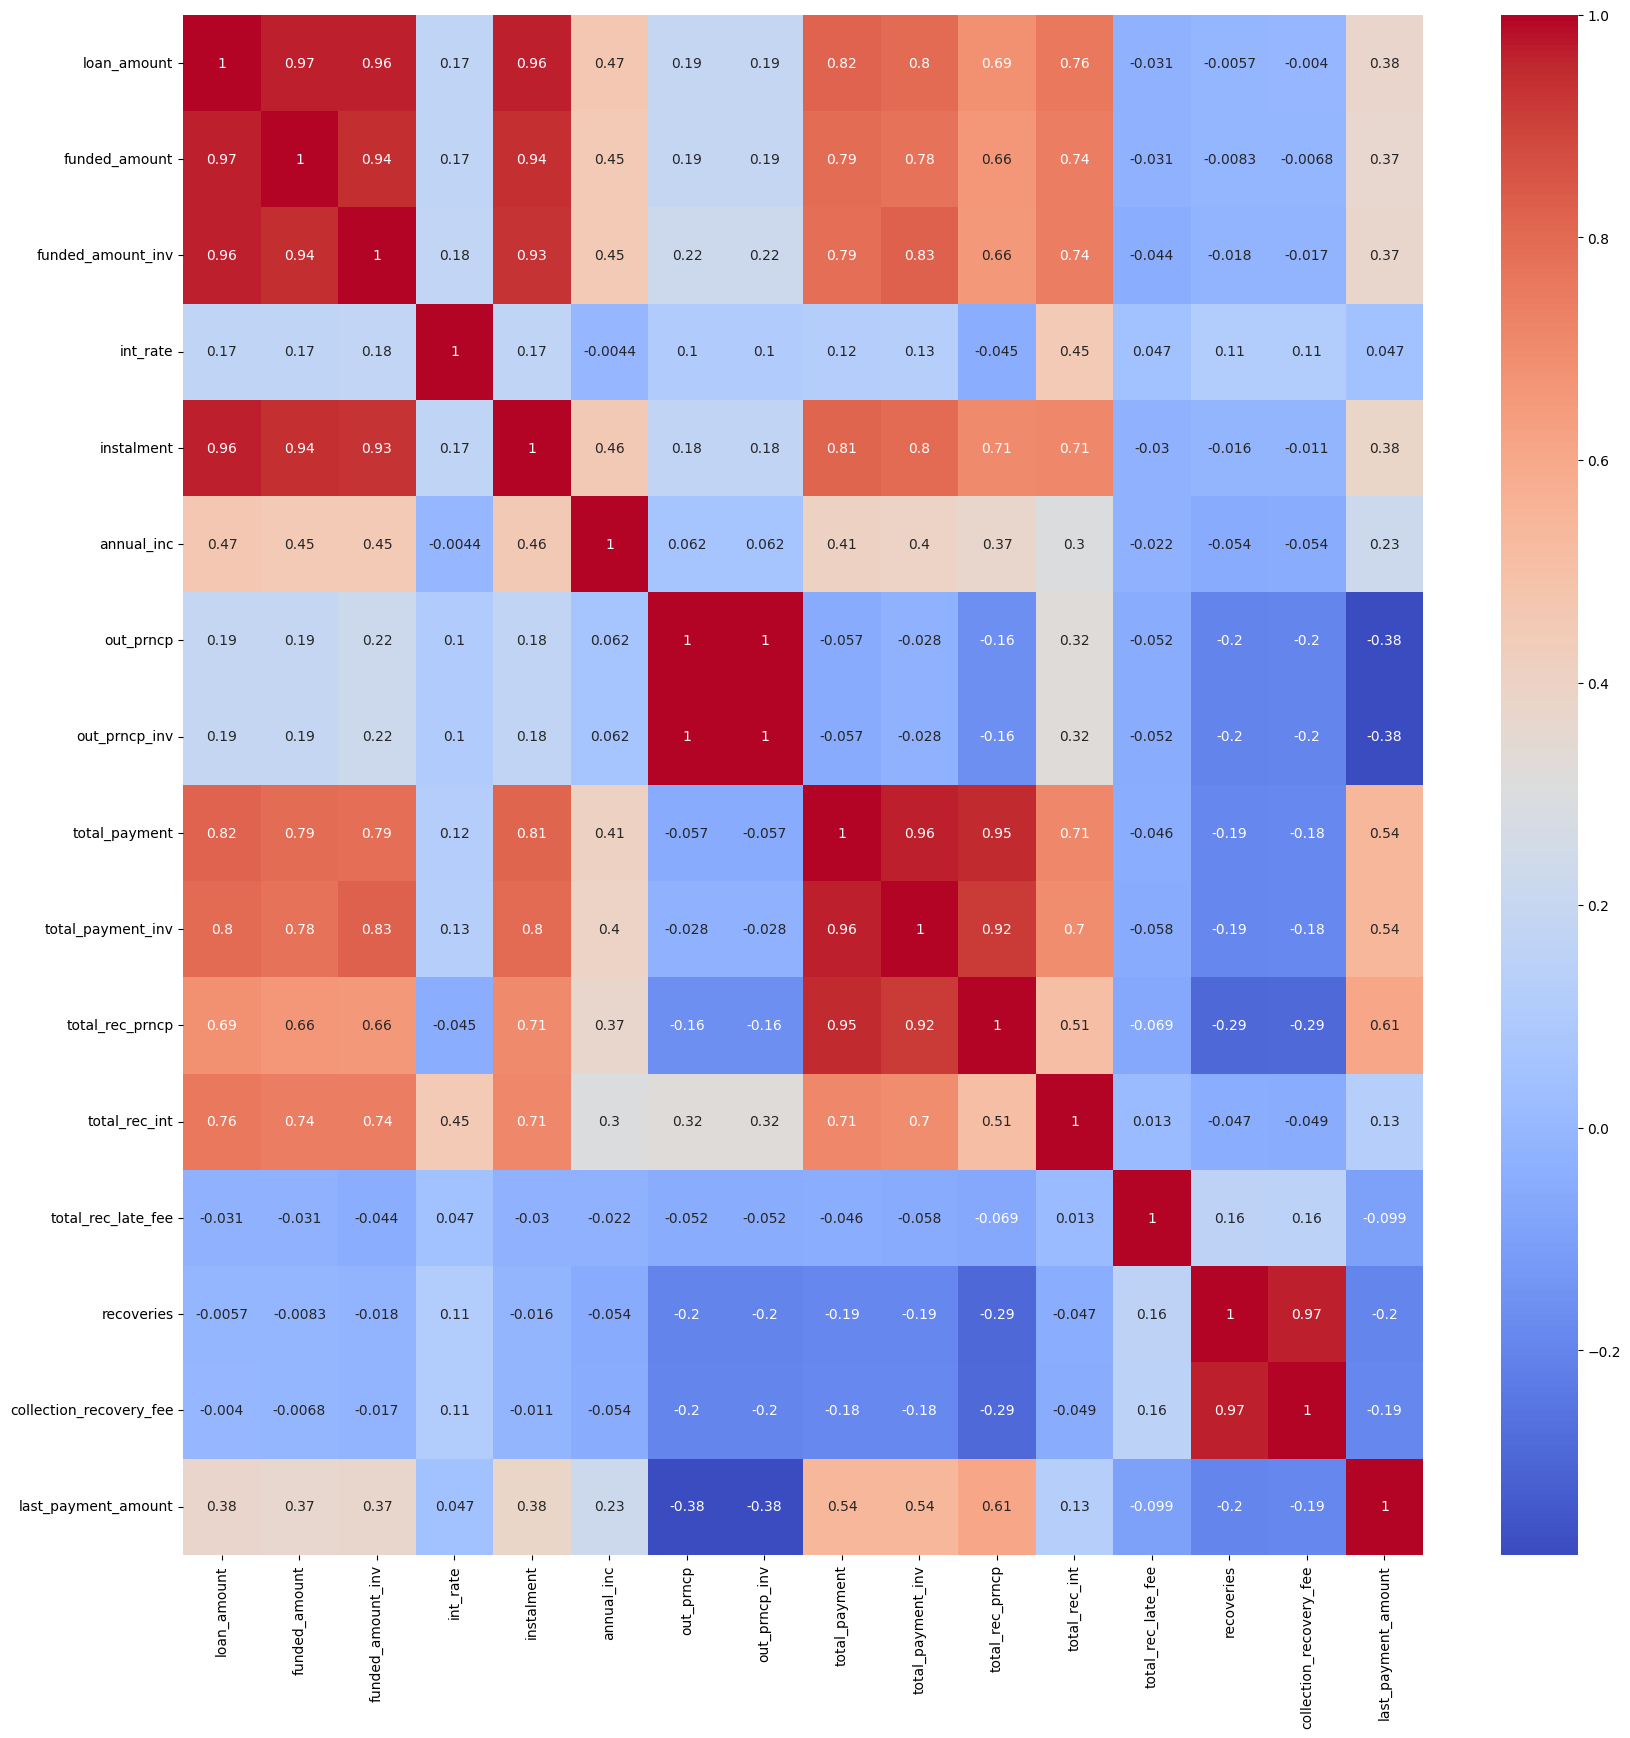

In [25]:
to_plot.plot_heatmap()

In [8]:
df_corr=df_selected.corr()

NameError: name 'df_selected' is not defined

In [7]:
for col in df_selected.columns:
    print(df_selected.loc[:, df_selected.corr()[col]>0.9].columns)

NameError: name 'df_selected' is not defined

In [38]:
columns_to_drop=[ 'funded_amount', 'funded_amount_inv', 'instalment', 'out_prncp_inv', 'total_payment_inv', 'total_rec_prncp','collection_recovery_fee']

In [40]:
df_selected=df_selected.drop(columns_to_drop, axis=1)

KeyError: "['collection_recovery_fee'] not found in axis"

In [41]:
df_selected

,loan_amount,int_rate,annual_inc,out_prncp,total_payment,total_rec_int,total_rec_late_fee,recoveries,last_payment_amount
0,69.831654,3.368816,6.910281,4.197504,33.246738,10.776851,0.000000,0.0,4.937219
1,84.360281,3.228661,6.942183,4.287440,39.063039,11.997706,0.000000,0.0,5.324908
2,90.685402,3.368816,7.088611,0.000000,58.036232,12.131470,0.000000,0.0,7.833362
3,88.513779,4.921304,6.875203,0.000000,57.061386,12.547079,0.000000,0.0,7.886412
4,88.513779,2.943931,7.329377,4.308386,40.529710,11.933760,0.000000,0.0,5.413133
...,...,...,...,...,...,...,...,...,...
54199,31.282845,5.251497,6.742963,0.000000,24.583272,8.481716,0.000000,0.0,5.541354
54203,62.609205,3.920698,6.534466,0.000000,43.742928,12.500783,0.000000,0.0,4.737064
54204,53.633811,3.439734,7.022192,0.000000,38.023005,10.687933,0.000000,0.0,4.392737
54221,60.569778,4.694246,6.598386,0.000000,41.305156,9.406609,0.000000,0.0,4.075422


In [42]:
to_plot=Plotter(df_selected)

<Axes: >

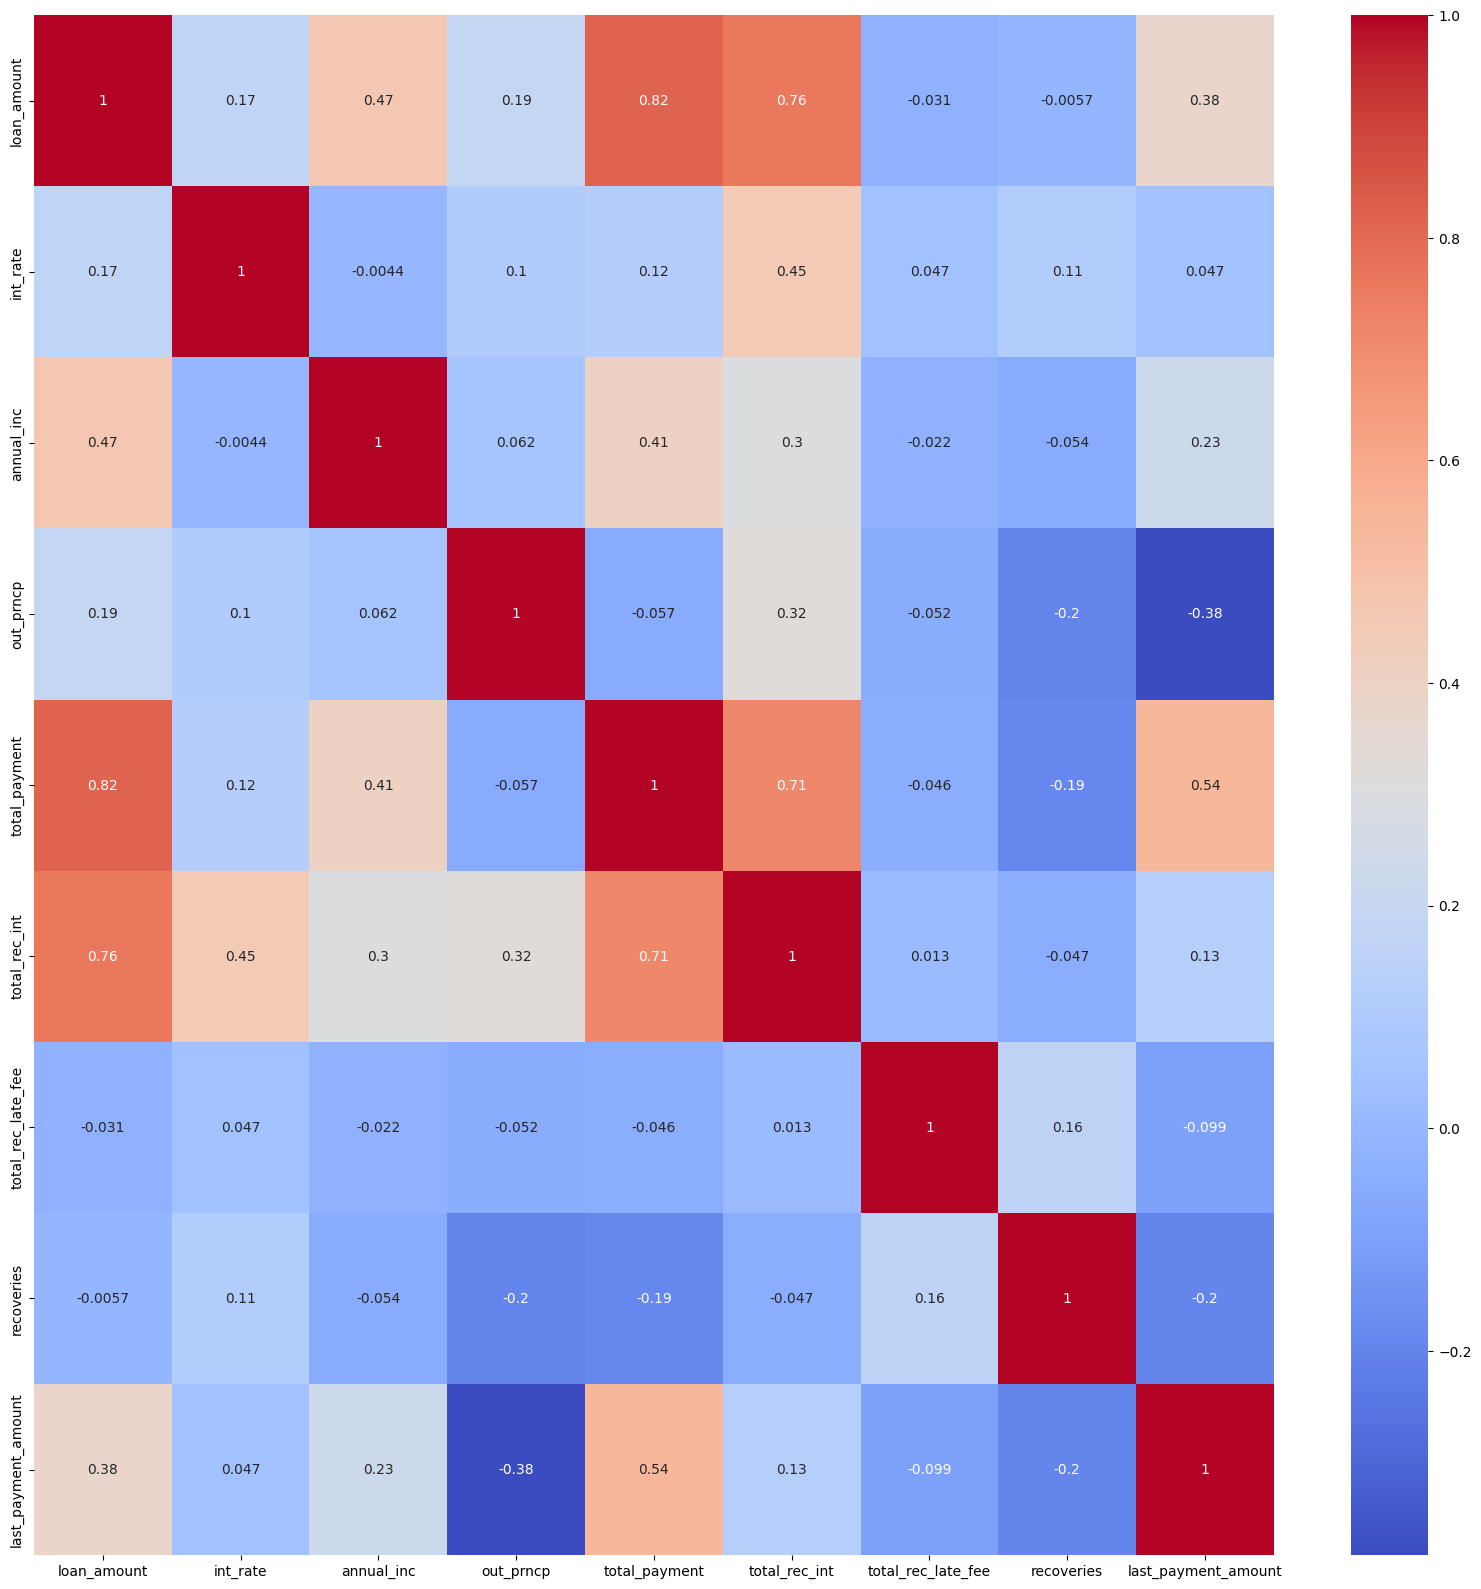

In [43]:
to_plot.plot_heatmap()

/Users/kyungmioh/AICore/Exploratory-Data-Analysis---Customer-Loans-in-Finance/df_visualisation.py:17: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  return self.df.hist(ax=ax)


array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'annual_inc'}>],
       [<Axes: title={'center': 'out_prncp'}>,
        <Axes: title={'center': 'total_payment'}>,
        <Axes: title={'center': 'total_rec_int'}>],
       [<Axes: title={'center': 'total_rec_late_fee'}>,
        <Axes: title={'center': 'recoveries'}>,
        <Axes: title={'center': 'last_payment_amount'}>]], dtype=object)

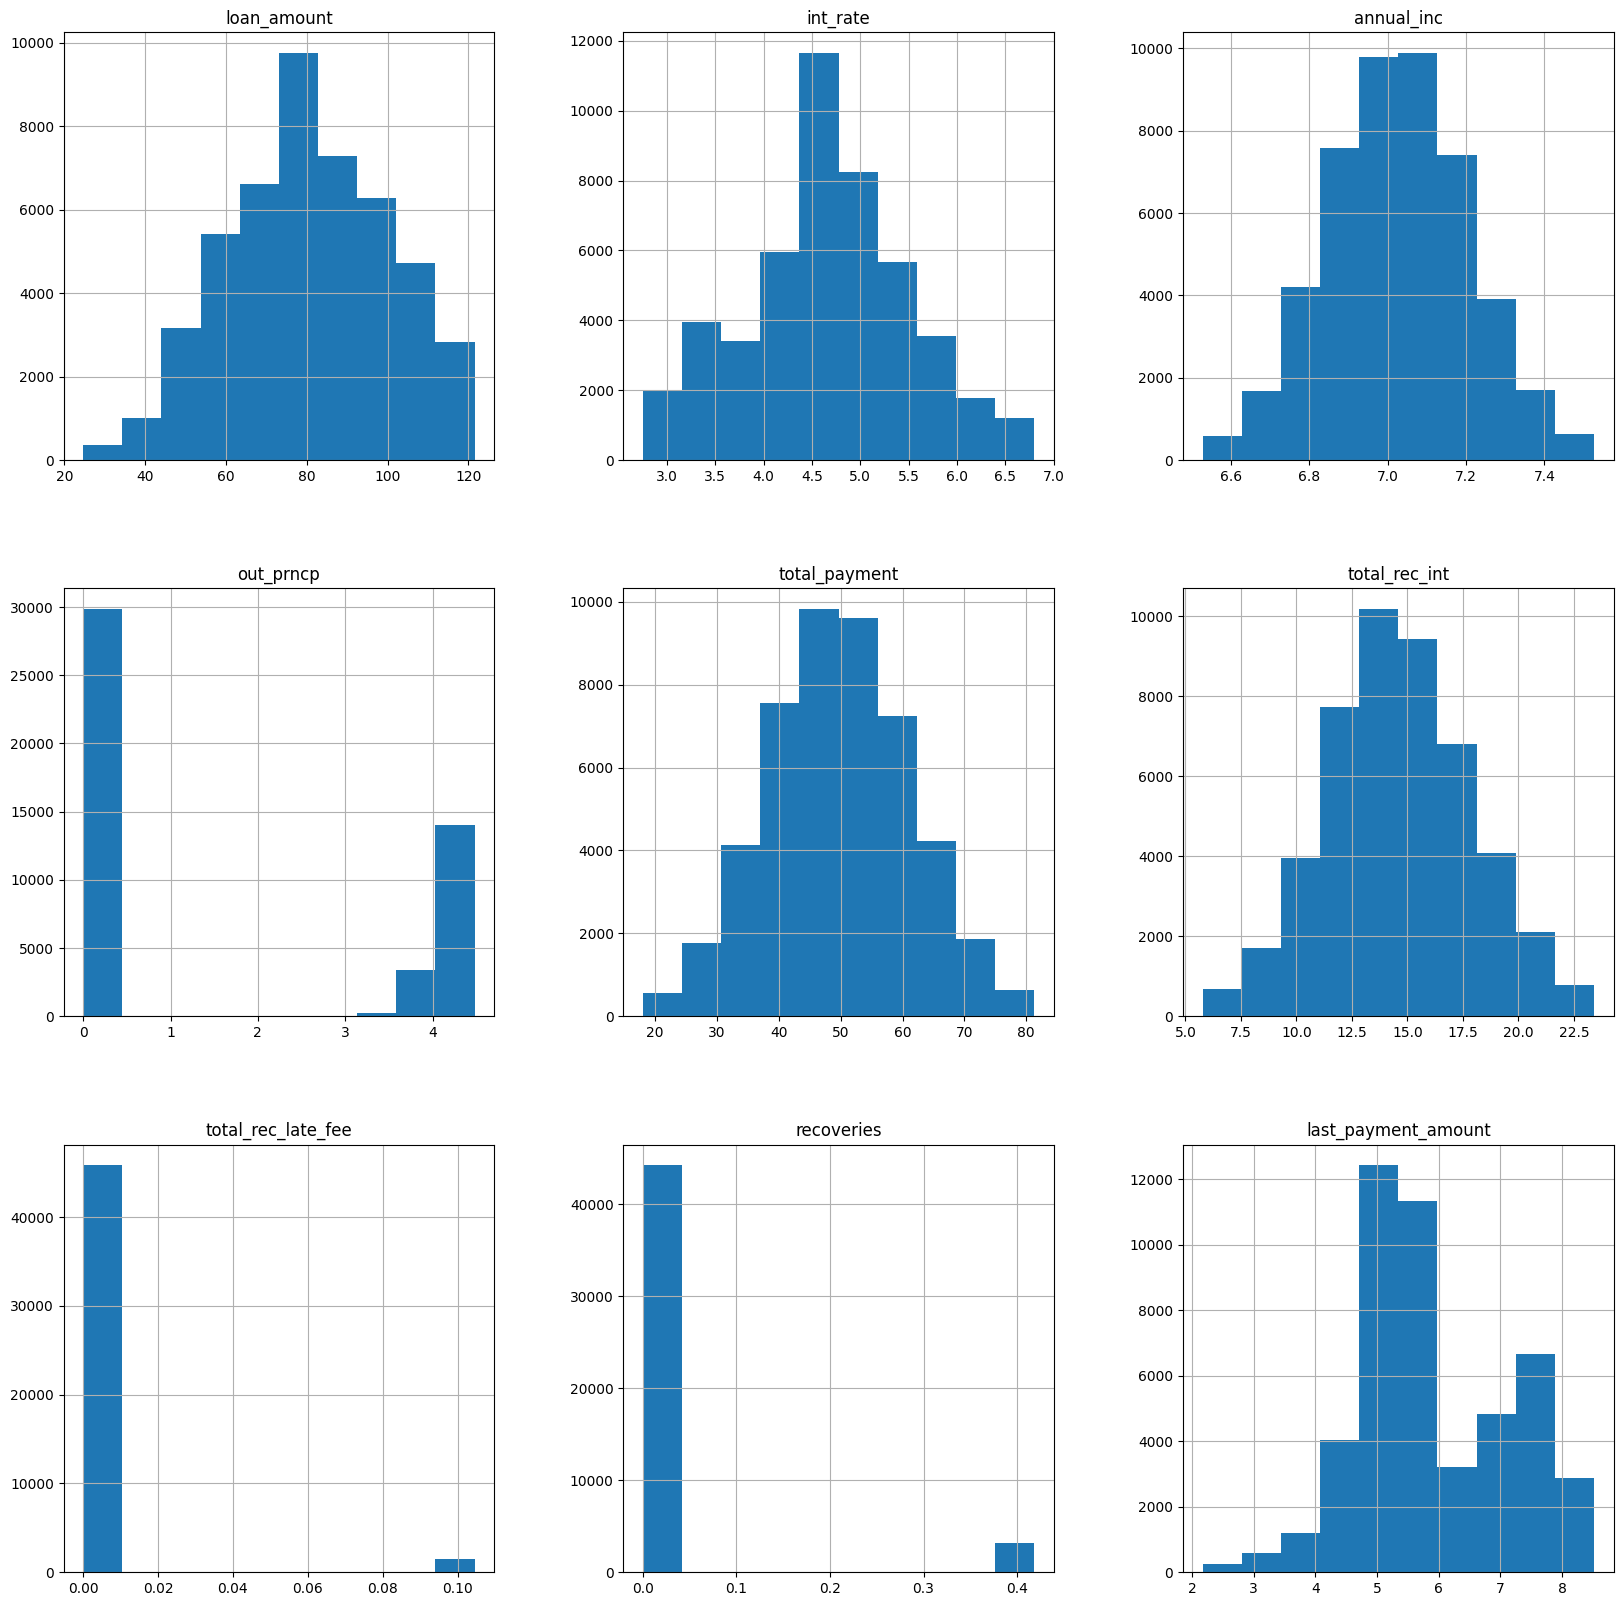

In [44]:
to_plot.df_hist()